# Linear Regression - Simple

This example demonstrates a very simple linear regression model. Looking at the data you can see a clear linear relationship between the x and y columns. The __test__ data also exhibits this relationship and thus we expect accurate predictions. Lowering `eta` and `tolerance` produce even more accurate predictions at the cost of more iterations. Good `eta` values are between 0.001 and 0.00001. Good values for `tolerance` are between 0.1 and 0.002. Values that are too large will cause the gradient descent algorithm to oscillate wildly and eventually lead to `-inf` or `inf` and produce values of `nan`.

## Build the model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from ml.regression.linear import LinearRegressionModel, LinearRegressionModel2

target = 'y'
features = ['x']

# Define a linearly dependent dataset
data = pd.DataFrame(
    data=list(zip(np.linspace(1, 10, 10),
                  np.linspace(4, 22, 10))), columns=['x', 'y'])

# Build a LinearRegressionModel
model = LinearRegressionModel()
model.eta = 1e-3
model.tolerance = 5e-2
model.learn(data, features, target)
test = pd.DataFrame(data=list(zip(np.linspace(11, 14, 4), np.linspace(24, 30, 4))), columns=['x', 'y'])
predictions = model.predict(test, features)

# We expect the predicted values to be very accurate as there is a direct linear relationship in the data
print('Predictions: {}, Iterations; {}, Weights: {}'.format(predictions, model.iterations, model.weights))

Predictions: [ 24.09443294  26.11792791  28.14142288  30.16491785], Iterations; 1138, Weights: [ 1.83598827  2.02349497]


## Visualize the results

[]

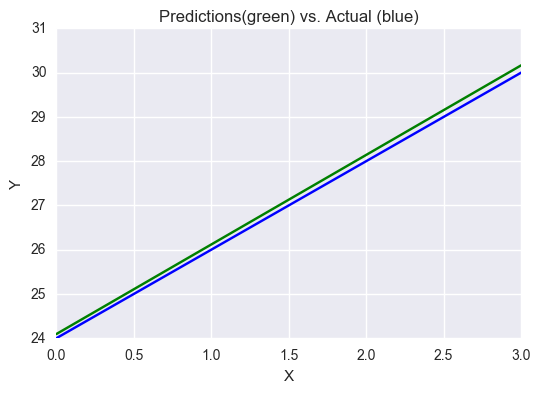

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(predictions, 'g-', test['y'], 'b-')
ax.set_title('Predictions(green) vs. Actual (blue)')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot()

[]

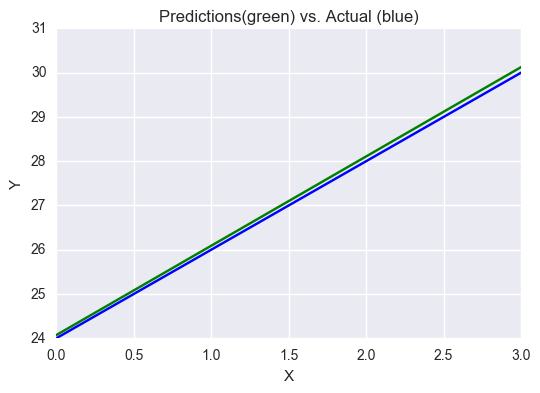

In [15]:
from ml.regression.linear import LinearRegressionModel2
model2 = LinearRegressionModel2()
model2.optimize(data[features].values, data[target].values)
ones = np.ones([test.shape[0], 1])
t = np.concatenate([ones, test[features]], axis=1)
predictions = model2.predict(t)

sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(predictions, 'g-', test['y'], 'b-')
ax.set_title('Predictions(green) vs. Actual (blue)')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.plot()
